# Fine-tuning BERT för finansiell sentimentanalys

## Modellbygge och träning

### Modellarkitektur
Vi använde en BERT-small modell (`prajjwal1/bert-small`) som bas för vår sentimentanalys. Denna modell är en mindre version av BERT med färre parametrar, vilket gör den snabbare att träna men fortfarande kraftfull nog för vår uppgift.


Träningsprocess
Vi tränade modellen i flera steg:

1. Initial träning med standardparametrar
2. Utvärdering av checkpoints för att hitta den bästa modellen
3. Finjustering med klassvikter för att hantera obalanserad data


# Träningsparametrar för bästa modellen (checkpoint-1755)
training_args = TrainingArguments(
    output_dir="models/bert-small-finance",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    num_train_epochs=4,
    warmup_ratio=0.1,
    lr_scheduler_type="linear",
    weight_decay=0.01,
)

Dataanalys
Klassfördelning
Vårt dataset hade en obalanserad fördelning av klasser, vilket påverkade modellens prestanda:

Klassfördelning
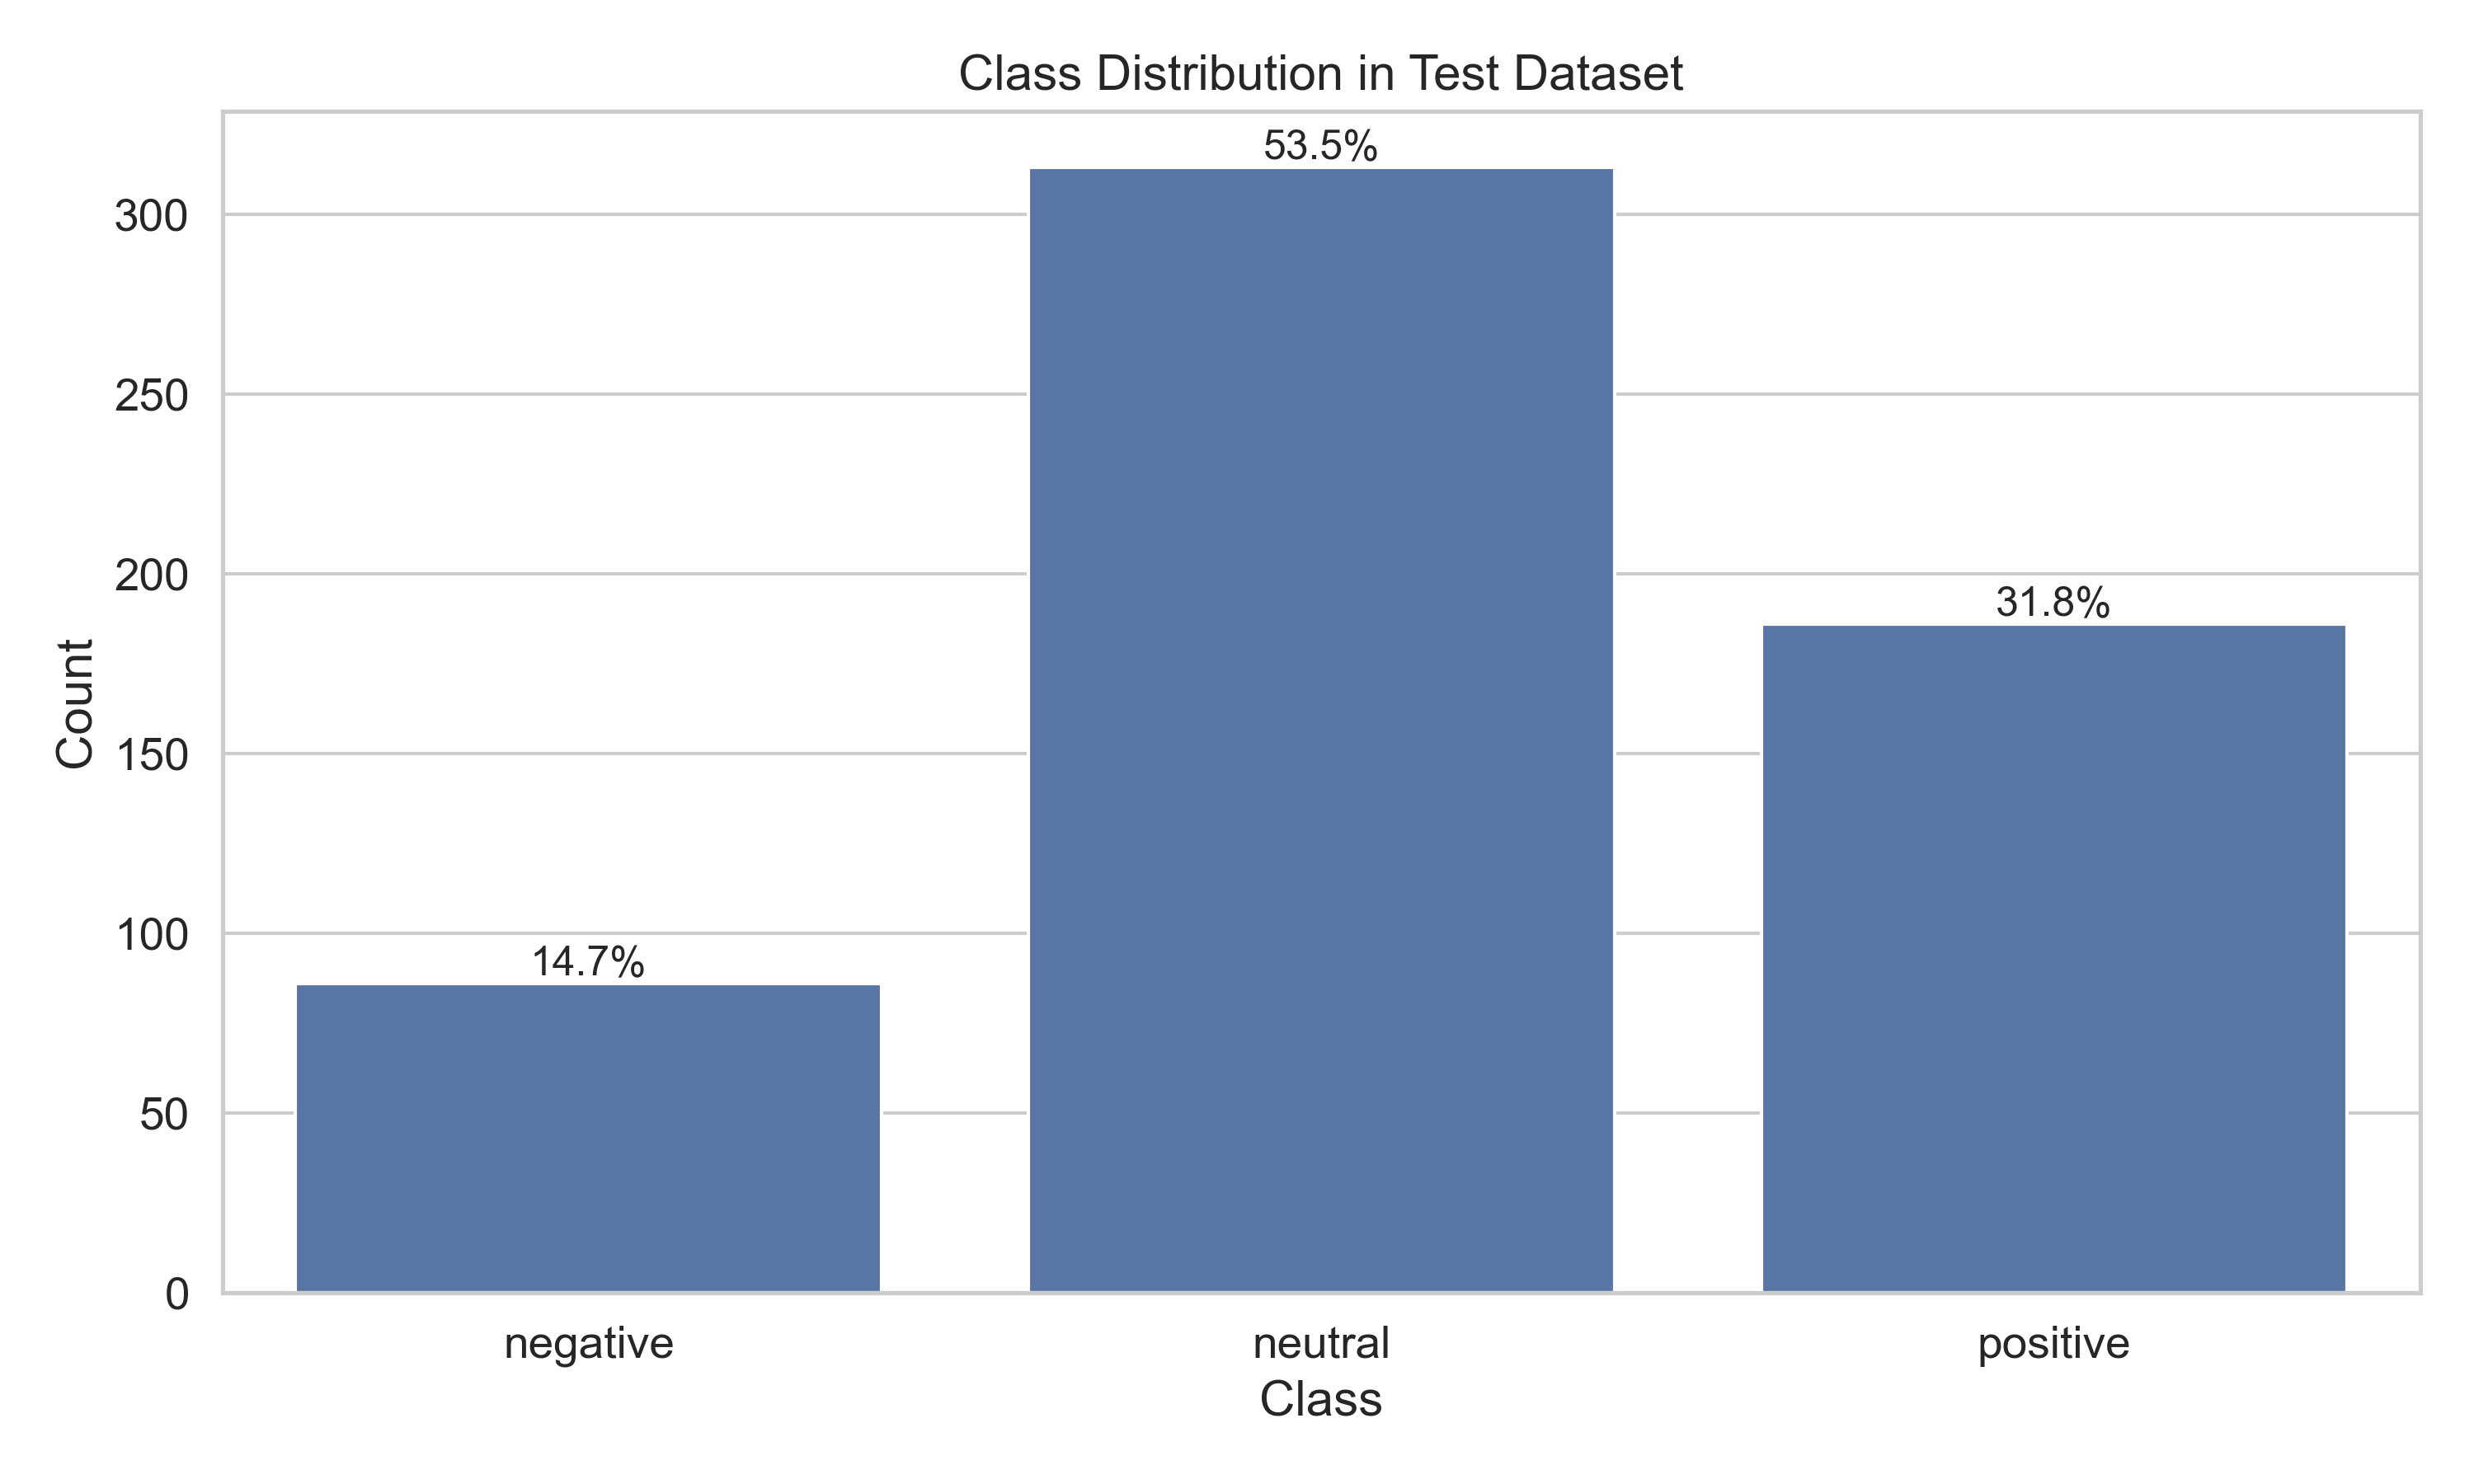

För att hantera denna obalans implementerade vi klassvikter:

# Klassvikter baserade på invers frekvens
class_weights = [0.62, 1.05, 2.26]  # Negativ, Neutral, Positiv



Resultat och utvärdering
Confusion Matrix
Förväxlingsmatrisen visar hur vår modell presterar för varje klass:
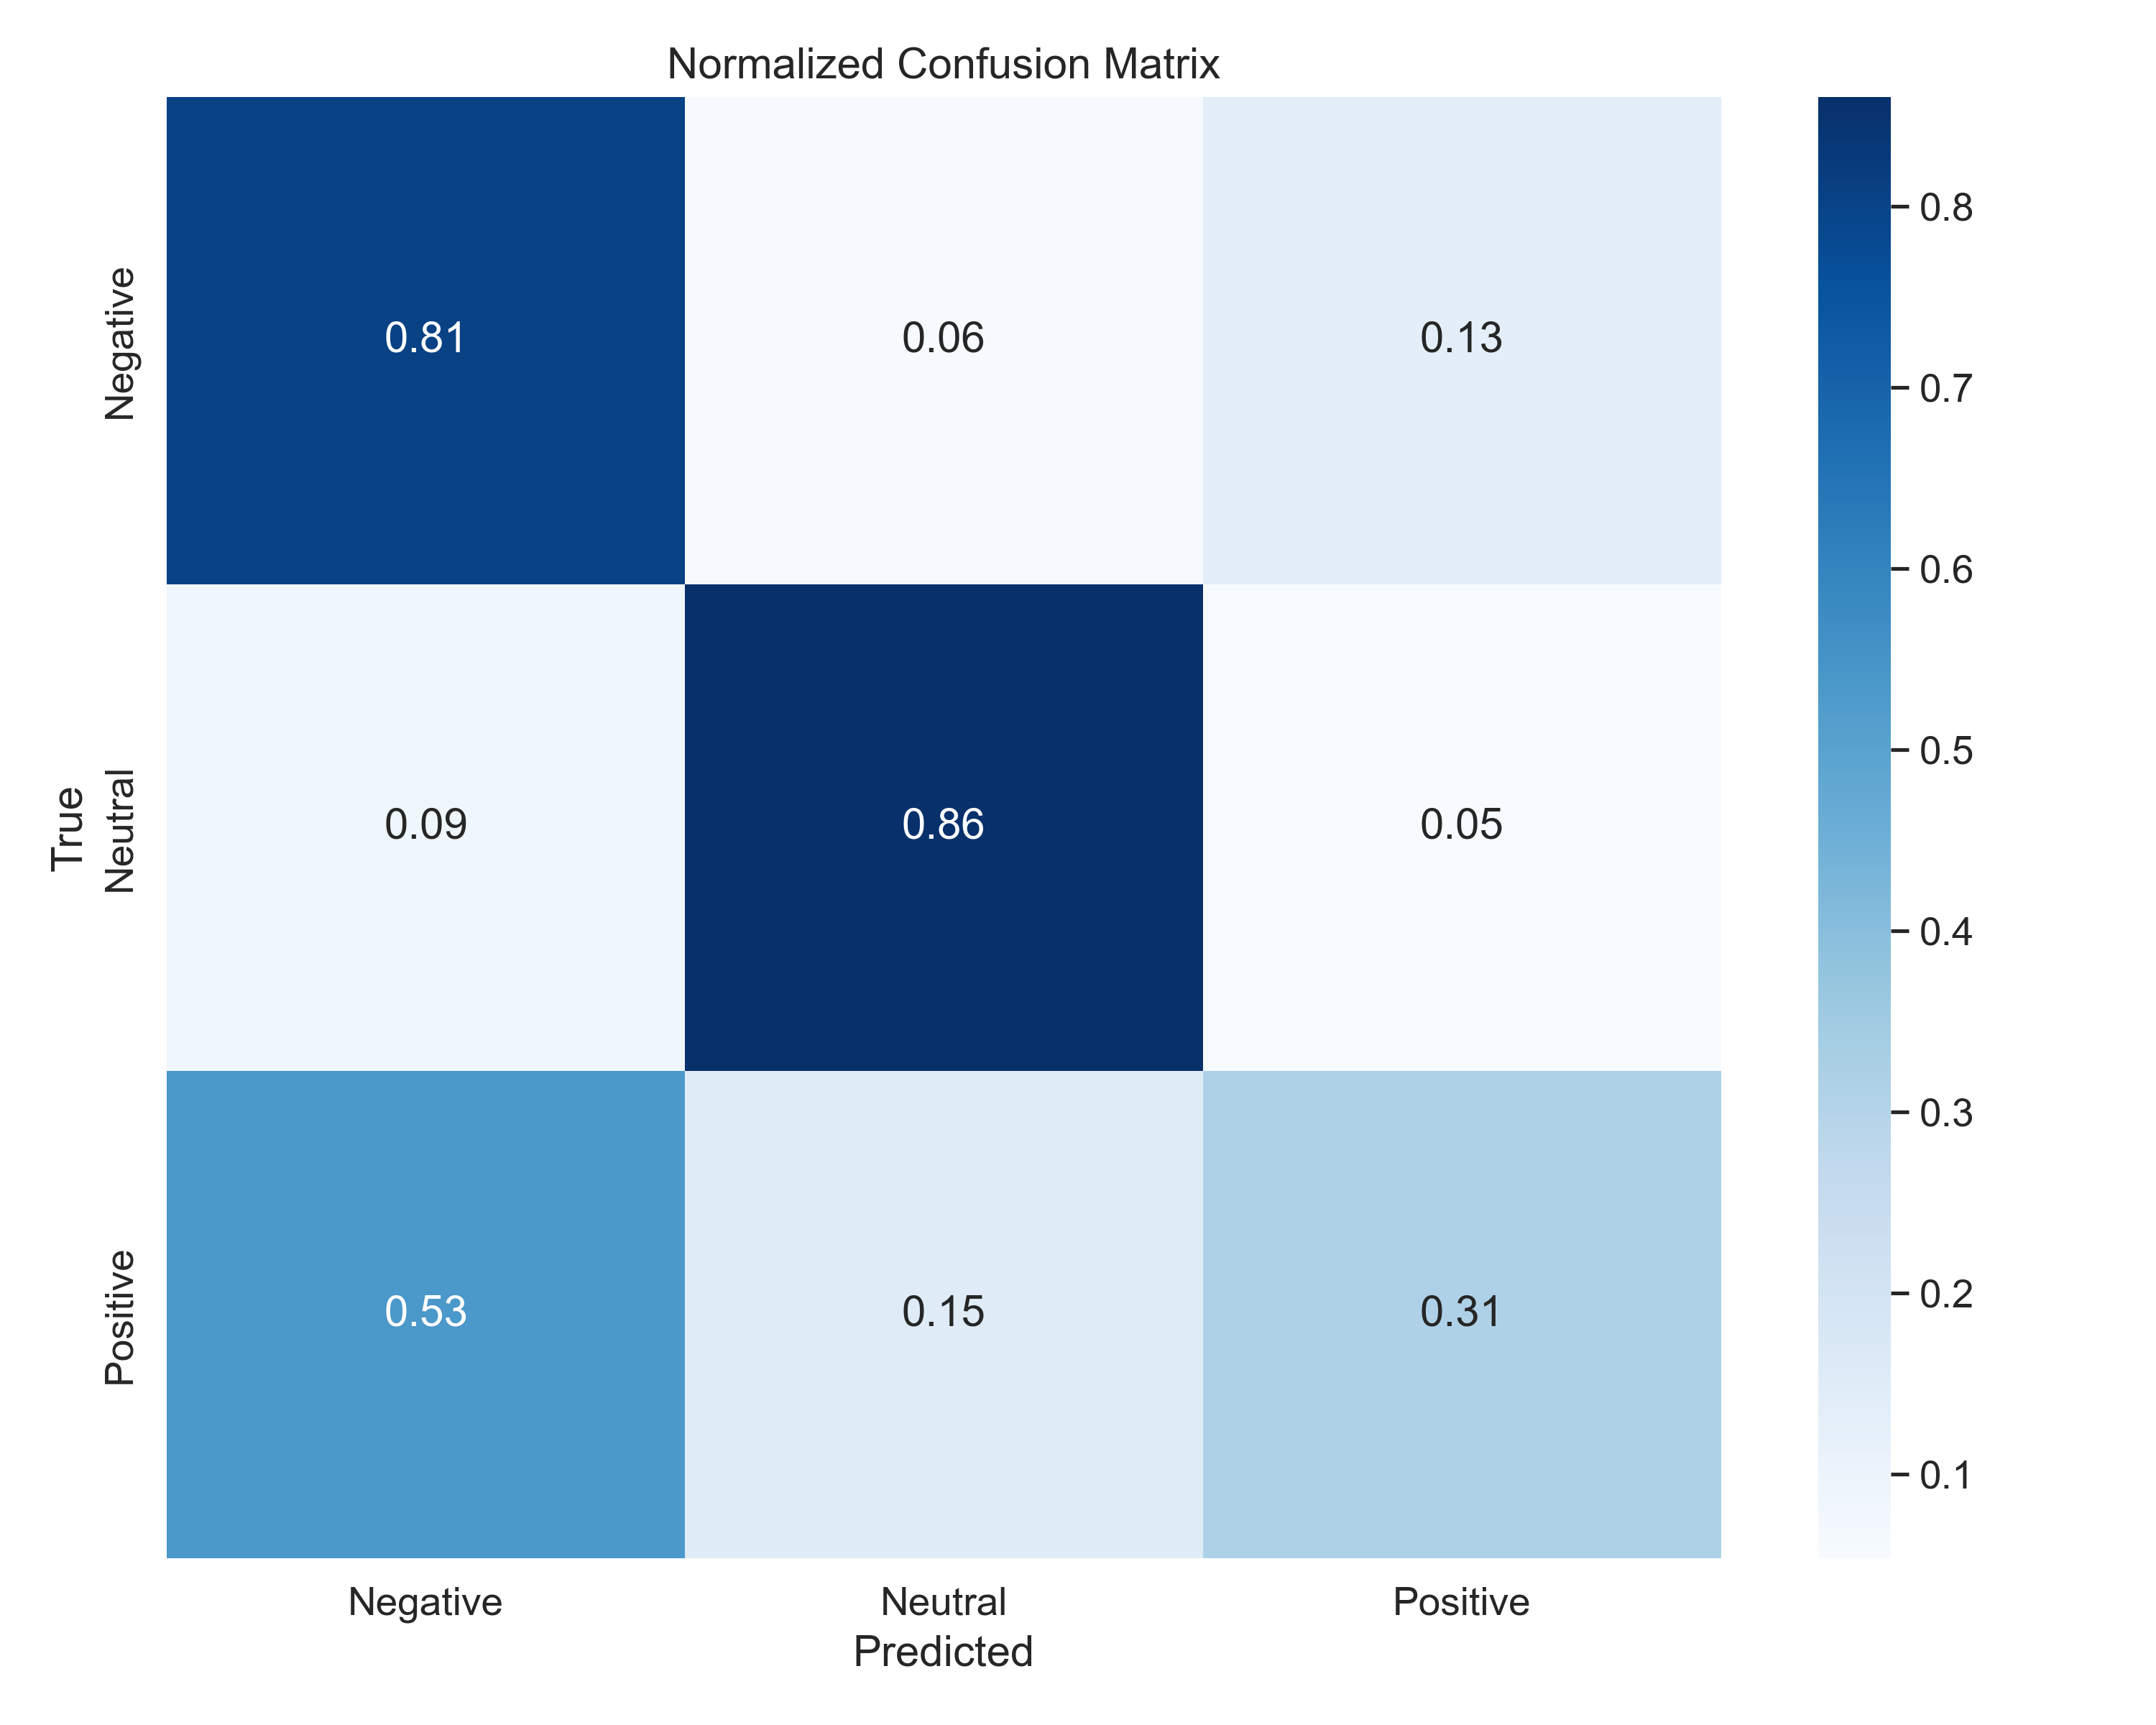

Prestandamått per klass
Här ser vi precision, recall och F1-score för varje klass:
![performance_metrics.png](attachment:performance_metrics.png)

Bästa modellen: checkpoint-1755
Vår bästa modell uppnådde följande resultat på testdata:


              precision    recall  f1-score   support

    Negative       0.80      0.81      0.81       313
    Neutral        0.84      0.86      0.85       186
    Positive       0.34      0.31      0.33        86
    accuracy                           0.75       585



Slutsatser
Modellen presterar mycket bra på negativa och neutrala klasser (F1 > 0.80)
Den positiva klassen är svårare att klassificera korrekt (F1 = 0.33)


Klassobalans är fortfarande en utmaning, särskilt för den positiva klassen
Framtida förbättringar
- Samla mer data för den positiva klassen
- Experimentera med olika klassvikter
- Prova andra regulariseringstekniker
- Testa större BERT-modeller för potentiellt bättre prestanda